In [1]:
import time
import numpy as np
import pandas as pd

import galsim #install with conda install -c conda_forge galsim

import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.cm as cm
import matplotlib.colors as norm
from matplotlib.gridspec import SubplotSpec
import seaborn as sns

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_validate, KFold, StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.pipeline import make_pipeline, Pipeline #This allows one to build different steps together
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.compose import TransformedTargetRegressor

from tqdm import tqdm 

import target_predicting_RF_function_and_feature_ranking_TNGSIM_0D as functions
import RF_target_predicting_and_learning_curves_functions_TNGSIM_0D as tp_lc_functions

import os
os.mkdir('TNG-SIM_images/v27_SR_eqn_search_allmorph')

In [2]:
# Using the 0D TNG100 SIM data at z=0 (version 6 of the dataset that includes Mvir in this notebook, 
# for further explanation see Notebook v3 updated and v14)

df_0D = pd.read_csv('TNG-SIM_images/v3_initial_analysis/v6_TNG-SIM_0D_Dataset_wMvir.csv')
df_raw = pd.read_csv('TNG-SIM_images/v3_initial_analysis/v4_TNG-SIM_Raw_Dataset.csv')
print("df_0D.shape", df_0D.shape)
print("df_raw.shape", df_raw.shape)

df_0D.shape (21598, 17)
df_raw.shape (21598, 19)


### <font color='purple'> <a id =10> </a> <br> Take Log10 of all features and target, both 0D & raw

### <font color='purple'> <a id =10> </a> <br> All morphologies Raw Dataset Eqn Search
    
Run the following file on terminal:
    SR_TNG-SIM_allmorphologies_eqn_search_raw.py

#### <font color='purple'> <a id =10> </a> <br> All morphologies Raw 1K iterations

In [3]:
# choose a subsample of 8K galaxies to use for eqn search with SR
df_sample = df_raw.sample(n = 8000, random_state = 2023)

In [50]:
v1_SR_eqns_n_iter1K = pd.read_csv('/Users/festabu/Desktop/ML_galaxy_size_project/Codes/TNG-SIM_images/v27_SR_eqn_search_allmorph/SR_v1_allmorph_eqn_search/run1_hall_of_fame_2024-03-24_140650.777.csv', sep='|')

In [57]:
# for i in range(SR_eqns_n_iter1K.shape[0]):
for i in range(20):
    
    print (v1_SR_eqns_n_iter1K.loc[i, 'Equation'])

3.3508172
pow(SubhaloVmaxRad, 0.48158443)
((SubhaloVmaxRad / 16.90071) + 2.3332129)
(pow(SubhaloStarMetallicity / SubhaloMstar, -0.43566832) * 3.644965e-5)
(pow(square(SubhaloStarMetallicity) / SubhaloMstar, -0.52410287) * 3.7510875e-7)
((pow(SubhaloStarMetallicity / SubhaloMstar, -0.59770477) * 6.693719e-9) / SubhaloStarMetallicity)
(((pow(SubhaloStarMetallicity / SubhaloMstar, -0.59520024) - 70357.734) * 7.2342763e-9) / SubhaloStarMetallicity)
(((pow(SubhaloStarMetallicity / SubhaloMstar, -0.59431595) - (SubhaloMH2 * -0.0005348154)) * 6.8431145e-9) / SubhaloStarMetallicity)
((((pow(SubhaloStarMetallicity / SubhaloMstar, -0.59431595) + SubhaloVmaxRad) - (SubhaloMH2 * -0.0005348154)) * 6.8431145e-9) / SubhaloStarMetallicity)
((((pow(SubhaloStarMetallicity / SubhaloMstar, -0.59431595) + square(SubhaloVmaxRad)) - (SubhaloMH2 * -0.0005348154)) * 6.8431145e-9) / SubhaloStarMetallicity)
((((pow(SubhaloStarMetallicity / SubhaloMstar, -0.59424603) - (SubhaloMH2 * -0.0005345967)) + pow(-2.3688

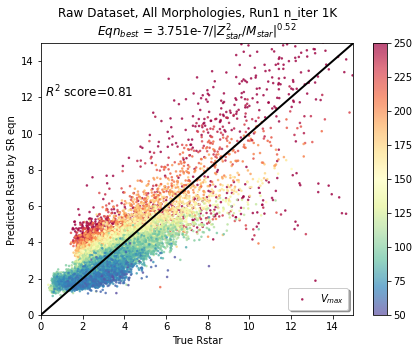

In [21]:
# 'best' eqn is the 4th eqn: 3.7510875e-7/Abs(SubhaloStarMetallicity**2/SubhaloMstar)**0.52410287

sr_allmorph_v1_eqn1 = 3.751e-7/(np.abs((df_raw.SubhaloStarMetallicity**2)/df_raw.SubhaloMstar)**0.524)

r2_score_allmorph_1=r2_score(df_raw.SubhaloRstar, sr_allmorph_v1_eqn1)

fig_complete, ax = plt.subplots(figsize=(7, 5))

fig_SR = ax.scatter(df_raw.SubhaloRstar, sr_allmorph_v1_eqn1,
            c = df_raw.SubhaloVmax, 
            cmap='Spectral_r',
            s=10, marker='.', alpha=0.7,label= r'$V_{max}$', vmin=50, vmax=250)
ax.text(0.2, 12, r'$R^{2}$ score=' + '{:.2f}'.format(r2_score_allmorph_1), size=12)
ax.axis([0.0,15, 0.0,15])
ax.plot([0.0, 15], [0.0, 15], color = 'black', linewidth = 2)
ax.set_title(r'Raw Dataset, All Morphologies, Run1 n_iter 1K' + '\n'+ r'$Eqn_{best}$ = 3.751e-7/$|Z_{star}^{2}/M_{star}|^{0.52}$')
ax.set_xlabel('True Rstar')
ax.legend(loc = 'lower right', shadow=True)
ax.set_ylabel('Predicted Rstar by SR eqn ')
fig_complete.colorbar(fig_SR, ax=ax)
# plt.savefig('TNG-SIM_images/v27_SR_eqn_search_allmorph/SR_v1_allmorph_eqn_search/v1_Allmorph_SR_besteqn_raw.jpeg', dpi=500)
plt.show()

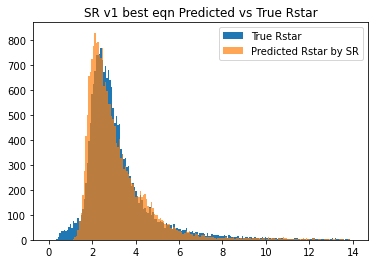

In [22]:
plt.hist(df_raw.SubhaloRstar, bins=200, label='True Rstar'
        , range=(0.0, 14))
plt.hist(sr_allmorph_v1_eqn1, bins=200, alpha=0.7, label='Predicted Rstar by SR'
        , range=(0.0, 14))
plt.legend(loc='upper right')
plt.title(r'SR v1 best eqn Predicted vs True Rstar')
# plt.savefig('TNG-SIM_images/v27_SR_eqn_search_allmorph/SR_v1_allmorph_eqn_search/v1_Histogram_SR_pred_true_TNG-SIM_Raw_AllDataset.jpeg', dpi=500)
plt.show()

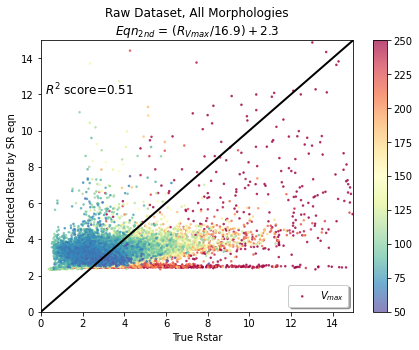

In [23]:
# 2nd eqn:((SubhaloVmaxRad / 16.90071) + 2.3332129)

sr_allmorph_v1_eqn1 = (df_raw.SubhaloVmaxRad/16.9)+2.33

r2_score_allmorph_1=r2_score(df_raw.SubhaloRstar, sr_allmorph_v1_eqn1)

fig_complete, ax = plt.subplots(figsize=(7, 5))

fig_SR = ax.scatter(df_raw.SubhaloRstar, sr_allmorph_v1_eqn1,
            c = df_raw.SubhaloVmax, 
            cmap='Spectral_r',
            s=10, marker='.', alpha=0.7,label= r'$V_{max}$', vmin=50, vmax=250)
ax.text(0.2, 12, r'$R^{2}$ score=' + '{:.2f}'.format(r2_score_allmorph_1), size=12)
ax.axis([0.0,15, 0.0,15])
ax.plot([0.0, 15], [0.0, 15], color = 'black', linewidth = 2)
ax.set_title(r'Raw Dataset, All Morphologies' + '\n'+ r'$Eqn_{2nd}$ = $(R_{Vmax}/16.9) + 2.3$')
ax.set_xlabel('True Rstar')
ax.legend(loc = 'lower right', shadow=True)
ax.set_ylabel('Predicted Rstar by SR eqn ')
fig_complete.colorbar(fig_SR, ax=ax)
# plt.savefig('TNG-SIM_images/v27_SR_eqn_search_allmorph/SR_v1_allmorph_eqn_search/v1_Allmorph_SR_2ndeqn_raw.jpeg', dpi=500)
plt.show()

#### <font color='purple'> <a id =10> </a> <br> All morphologies Raw 5K iterations

In [4]:
v1_SR_eqns_n_iter5K = pd.read_csv('/Users/festabu/Desktop/ML_galaxy_size_project/Codes/TNG-SIM_images/v27_SR_eqn_search_allmorph/SR_v1_allmorph_eqn_search/run2_hall_of_fame_2024-03-24_172037.898.csv', sep='|')

# for i in range(SR_eqns_n_iter1K.shape[0]):
for i in range(15):
    
    print (v1_SR_eqns_n_iter5K.loc[i, 'Equation'])

3.350066
pow(SubhaloVmaxRad, 0.4815736)
((SubhaloMstar * 3.9255127e-11) + 2.9917378)
(pow(SubhaloMstar * SubhaloVmaxRad, 0.2451324) / 114.75309)
((pow(SubhaloMstar, 0.24435173) / 19.629368) + (SubhaloStarMetallicity * -544.283))
square((pow(SubhaloMstar, 0.16467217) / 10.414343) + (SubhaloStarMetallicity * -125.07376))
square((SubhaloStarMetallicity * (SubhaloSFRinRad + -125.35008)) + (pow(SubhaloMstar, 0.16404063) / 10.282264))
square((SubhaloStarMetallicity * (-125.664406 + pow(1.2434211, SubhaloSFRinRad))) + (pow(SubhaloMstar, 0.16276143) / 10.0026245))
square((SubhaloStarMetallicity * -124.34743) + ((pow(SubhaloMstar, 0.16190177) - (SubhaloVmaxRad * (-0.002766214 * SubhaloSFRinRad))) / 9.819208))
square((((pow(SubhaloMstar + SubhaloMH2, 0.19495222) + pow(-1.2057605, SubhaloSFRinRad)) / 26.809484) - -0.43075332) + (SubhaloStarMetallicity * -104.82639))
square((((pow(SubhaloMstar + SubhaloMH2, 0.19495222) + pow(-1.2057605, SubhaloSFRinRad)) / 26.809484) - -0.43075332) + (SubhaloStarM

In [ ]:
15643.4454405376*(-SubhaloStarMetallicity + 0.000767718342281651*Abs(SubhaloMstar)**0.16467217)**2

In [ ]:
# 'best' eqn with 5K runs: 15643.4454405376*(-SubhaloStarMetallicity + 0.000767718342281651*Abs(SubhaloMstar)**0.16467217)**2

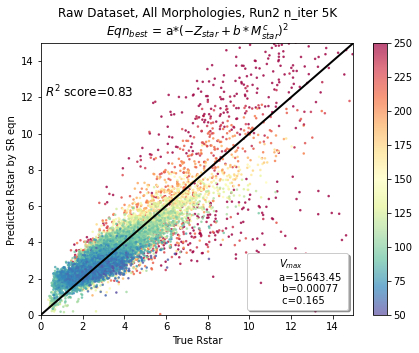

In [49]:
# 'best' eqn with 5K runs: 15643.4454405376*(-SubhaloStarMetallicity + 0.000767718342281651*Abs(SubhaloMstar)**0.16467217)**2

sr_allmorph_v2_eqn1 = 15643.45*(-df_raw.SubhaloStarMetallicity + 0.00077*(df_raw.SubhaloMstar)**0.165)**2

r2_score_allmorph_1=r2_score(df_raw.SubhaloRstar, sr_allmorph_v2_eqn1)

fig_complete, ax = plt.subplots(figsize=(7, 5))

fig_SR = ax.scatter(df_raw.SubhaloRstar, sr_allmorph_v2_eqn1,
            c = df_raw.SubhaloVmax, 
            cmap='Spectral_r',
            s=10, marker='.', alpha=0.7,label= r'$V_{max}$'+'\n'+'a=15643.45 \n b=0.00077 \n c=0.165', vmin=50, vmax=250)
ax.text(0.2, 12, r'$R^{2}$ score=' + '{:.2f}'.format(r2_score_allmorph_1), size=12)
ax.axis([0.0,15, 0.0,15])
ax.plot([0.0, 15], [0.0, 15], color = 'black', linewidth = 2)
ax.set_title(r'Raw Dataset, All Morphologies, Run2 n_iter 5K' + '\n'+ r'$Eqn_{best}$ = a*$(-Z_{star}+b*M_{star}^{c})^{2}$')
ax.set_xlabel('True Rstar')
ax.legend(loc = 'lower right', shadow=True)
ax.set_ylabel('Predicted Rstar by SR eqn ')
fig_complete.colorbar(fig_SR, ax=ax)
# plt.savefig('TNG-SIM_images/v27_SR_eqn_search_allmorph/SR_v1_allmorph_eqn_search/v1_run2_Allmorph_SR_besteqn_raw.jpeg', dpi=500)
plt.show()

In [ ]:
square((pow(SubhaloMstar, 0.16467217) / 10.414343) + (SubhaloStarMetallicity * -125.07376))

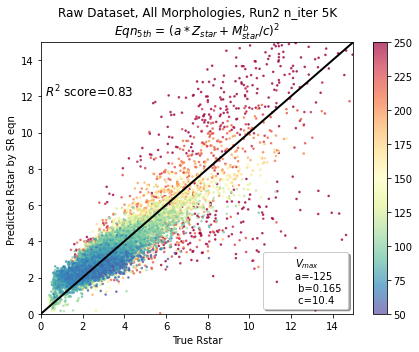

In [66]:
# 5th eqn: square((pow(SubhaloMstar, 0.16467217) / 10.414343) + (SubhaloStarMetallicity * -125.07376))

sr_allmorph_v2_eqn1 = ((-125.1*df_raw.SubhaloStarMetallicity) + (df_raw.SubhaloMstar**0.165)/10.4)**2

r2_score_allmorph_1=r2_score(df_raw.SubhaloRstar, sr_allmorph_v2_eqn1)

fig_complete, ax = plt.subplots(figsize=(7, 5))

fig_SR = ax.scatter(df_raw.SubhaloRstar, sr_allmorph_v2_eqn1,
            c = df_raw.SubhaloVmax, 
            cmap='Spectral_r',
            s=10, marker='.', alpha=0.7,label= r'$V_{max}$'+'\n'+'a=-125 \n b=0.165 \n c=10.4', vmin=50, vmax=250)
ax.text(0.2, 12, r'$R^{2}$ score=' + '{:.2f}'.format(r2_score_allmorph_1), size=12)
ax.axis([0.0,15, 0.0,15])
ax.plot([0.0, 15], [0.0, 15], color = 'black', linewidth = 2)
ax.set_title(r'Raw Dataset, All Morphologies, Run2 n_iter 5K' + '\n'+ r'$Eqn_{5th}$ = $(a*Z_{star} + M_{star}^{b}/c)^{2}$')
ax.set_xlabel('True Rstar')
ax.legend(loc = 'lower right', shadow=True)
ax.set_ylabel('Predicted Rstar by SR eqn ')
fig_complete.colorbar(fig_SR, ax=ax)
# plt.savefig('TNG-SIM_images/v27_SR_eqn_search_allmorph/SR_v1_allmorph_eqn_search/v1_run2_Allmorph_SR_5theqn_raw.jpeg', dpi=500)
plt.show()

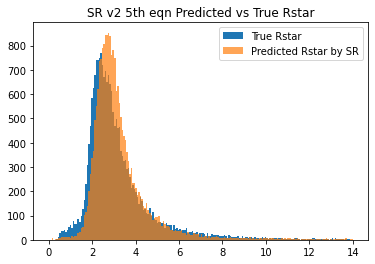

In [68]:
plt.hist(df_raw.SubhaloRstar, bins=200, label='True Rstar'
        , range=(0.0, 14))
plt.hist(sr_allmorph_v2_eqn1, bins=200, alpha=0.7, label='Predicted Rstar by SR'
        , range=(0.0, 14))
plt.legend(loc='upper right')
plt.title(r'SR v2 5th eqn Predicted vs True Rstar')
# plt.savefig('TNG-SIM_images/v27_SR_eqn_search_allmorph/SR_v1_allmorph_eqn_search/v1_run2_5theqn_Histogram_SR_pred_true_TNG-SIM_Raw_AllDataset.jpeg', dpi=500)
plt.show()

#### <font color='purple'> <a id =10> </a> <br> All morphologies Raw 10K iterations

In [8]:
v1_SR_eqns_n_iter10K = pd.read_csv('/Users/festabu/Desktop/ML_galaxy_size_project/Codes/TNG-SIM_images/v27_SR_eqn_search_allmorph/SR_v1_allmorph_eqn_search/run3_hall_of_fame_2024-03-29_180220.247.csv', sep='|')

# for i in range(SR_eqns_n_iter1K.shape[0]):
for i in range(15):
    
    print (v1_SR_eqns_n_iter10K.loc[i, 'Equation'])

3.350451
pow(SubhaloVmaxRad, 0.48157373)
((SubhaloMstar * 3.9300934e-11) + 2.9913177)
((pow(SubhaloMstar, 0.5015316) * 7.821894e-7) / SubhaloStarMetallicity)
((pow(SubhaloMstar, 0.6670093) * 2.3461766e-10) / square(SubhaloStarMetallicity))
((pow(SubhaloMstar, 0.5914463) * 9.148675e-9) / pow(SubhaloStarMetallicity, 1.558664))
((pow(SubhaloMstar, 0.60108256) * 1.6754698e-9) / square(SubhaloStarMetallicity + 0.002809708))
(((pow(SubhaloMstar, 0.594925) * 2.0149031e-9) / square(SubhaloStarMetallicity + 0.0029286302)) + -0.12675172)
(((pow(SubhaloMstar, 0.594925) + square(SubhaloVmaxRad)) * 2.0009656e-9) / square(SubhaloStarMetallicity + 0.0031176237))
(((pow(SubhaloMstar, 0.6016086) * 1.6371478e-9) / square(SubhaloStarMetallicity + 0.0029286302)) + (SubhaloMH2 * 1.1365617e-10))
((((pow(SubhaloMstar, 0.594925) - (SubhaloMH2 * -4.4753666e-5)) * 2.0414295e-9) / (SubhaloStarMetallicity + 0.009098183)) / SubhaloStarMetallicity)
((((pow(SubhaloMstar, 0.5954169) - (SubhaloMH2 * -4.475327e-5)) / 1

In [ ]:
3rd eqn
7.821894e-7*Abs(SubhaloMstar)**0.5015316/SubhaloStarMetallicity

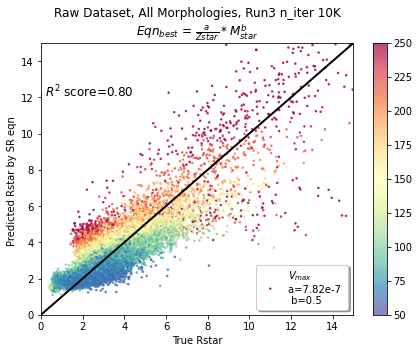

In [10]:
# 'best' eqn with 10K runs is the 3rd eqn: 7.821894e-7*(SubhaloMstar)**0.5015316/SubhaloStarMetallicity

a = 7.82e-7
b = 0.5

sr_allmorph_v2_eqn1 = (a/df_raw.SubhaloStarMetallicity) * (df_raw.SubhaloMstar)**b

r2_score_allmorph_1=r2_score(df_raw.SubhaloRstar, sr_allmorph_v2_eqn1)

fig_complete, ax = plt.subplots(figsize=(7, 5))

fig_SR = ax.scatter(df_raw.SubhaloRstar, sr_allmorph_v2_eqn1,
            c = df_raw.SubhaloVmax, 
            cmap='Spectral_r',
            s=10, marker='.', alpha=0.7,label= r'$V_{max}$'+'\n'+'a=7.82e-7 \n b=0.5', vmin=50, vmax=250)
ax.text(0.2, 12, r'$R^{2}$ score=' + '{:.2f}'.format(r2_score_allmorph_1), size=12)
ax.axis([0.0,15, 0.0,15])
ax.plot([0.0, 15], [0.0, 15], color = 'black', linewidth = 2)
ax.set_title(r'Raw Dataset, All Morphologies, Run3 n_iter 10K' + '\n'+ r'$Eqn_{best}$ = $\frac{a}{Zstar}*M_{star}^{b}$')
ax.set_xlabel('True Rstar')
ax.legend(loc = 'lower right', shadow=True)
ax.set_ylabel('Predicted Rstar by SR eqn ')
fig_complete.colorbar(fig_SR, ax=ax)
# plt.savefig('TNG-SIM_images/v27_SR_eqn_search_allmorph/SR_v1_allmorph_eqn_search/v1_run3_Allmorph_SR_besteqn_raw.jpeg', dpi=500)
plt.show()

In [ ]:
((pow(SubhaloMstar, 0.6670093) * 2.3461766e-10) / square(SubhaloStarMetallicity))


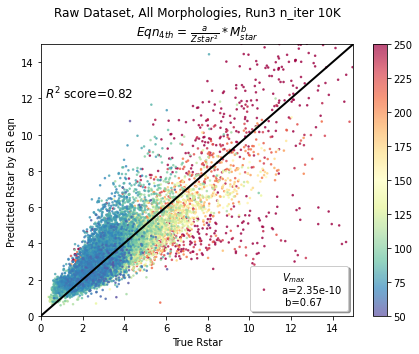

In [13]:
# 4th eqn with 10K runs: ((pow(SubhaloMstar, 0.6670093) * 2.3461766e-10) / square(SubhaloStarMetallicity))

a = 2.35e-10
b = 0.67

sr_allmorph_v2_eqn1 = (a/(df_raw.SubhaloStarMetallicity**2)) * (df_raw.SubhaloMstar)**b

r2_score_allmorph_1=r2_score(df_raw.SubhaloRstar, sr_allmorph_v2_eqn1)

fig_complete, ax = plt.subplots(figsize=(7, 5))

fig_SR = ax.scatter(df_raw.SubhaloRstar, sr_allmorph_v2_eqn1,
            c = df_raw.SubhaloVmax, 
            cmap='Spectral_r',
            s=10, marker='.', alpha=0.7,label= r'$V_{max}$'+'\n'+'a=2.35e-10 \n b=0.67', vmin=50, vmax=250)
ax.text(0.2, 12, r'$R^{2}$ score=' + '{:.2f}'.format(r2_score_allmorph_1), size=12)
ax.axis([0.0,15, 0.0,15])
ax.plot([0.0, 15], [0.0, 15], color = 'black', linewidth = 2)
ax.set_title(r'Raw Dataset, All Morphologies, Run3 n_iter 10K' + '\n'+ r'$Eqn_{4th}$ = $\frac{a}{Zstar^{2}}*M_{star}^{b}$')
ax.set_xlabel('True Rstar')
ax.legend(loc = 'lower right', shadow=True)
ax.set_ylabel('Predicted Rstar by SR eqn ')
fig_complete.colorbar(fig_SR, ax=ax)
# plt.savefig('TNG-SIM_images/v27_SR_eqn_search_allmorph/SR_v1_allmorph_eqn_search/v1_run3_Allmorph_SR_4theqn_raw.jpeg', dpi=500)
plt.show()

In [ ]:
(((pow(SubhaloMstar, 0.594925) + square(SubhaloVmaxRad)) * 2.0009656e-9) / square(SubhaloStarMetallicity + 0.0031176237))


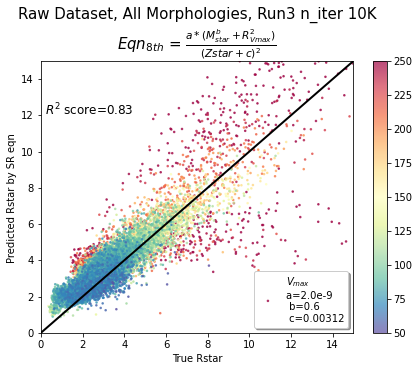

In [20]:
# 8th eqn with 10K runs: (((pow(SubhaloMstar, 0.594925) + square(SubhaloVmaxRad)) * 2.0009656e-9) / square(SubhaloStarMetallicity + 0.0031176237))


a = 2.0e-9
b = 0.6
c = 0.00312

sr_allmorph_v2_eqn1 = (a* (df_raw.SubhaloMstar**b + df_raw.SubhaloVmaxRad**2)) / (df_raw.SubhaloStarMetallicity + c)**2

r2_score_allmorph_1=r2_score(df_raw.SubhaloRstar, sr_allmorph_v2_eqn1)

fig_complete, ax = plt.subplots(figsize=(7, 5))

fig_SR = ax.scatter(df_raw.SubhaloRstar, sr_allmorph_v2_eqn1,
            c = df_raw.SubhaloVmax, 
            cmap='Spectral_r',
            s=10, marker='.', alpha=0.7,label= r'$V_{max}$'+'\n'+'a=2.0e-9 \n b=0.6 \n c=0.00312', vmin=50, vmax=250)
ax.text(0.2, 12, r'$R^{2}$ score=' + '{:.2f}'.format(r2_score_allmorph_1), size=12)
ax.axis([0.0,15, 0.0,15])
ax.plot([0.0, 15], [0.0, 15], color = 'black', linewidth = 2)
ax.set_title(r'Raw Dataset, All Morphologies, Run3 n_iter 10K' + '\n'+ r'$Eqn_{8th}$ = $\frac{a*(M_{star}^{b}+R_{Vmax}^{2})}{(Zstar+c)^{2}}$', fontsize=15)
ax.set_xlabel('True Rstar')
ax.legend(loc = 'lower right', shadow=True)
ax.set_ylabel('Predicted Rstar by SR eqn ')
fig_complete.colorbar(fig_SR, ax=ax)
# plt.savefig('TNG-SIM_images/v27_SR_eqn_search_allmorph/SR_v1_allmorph_eqn_search/v1_run3_Allmorph_SR_8theqn_raw.jpeg', dpi=500)
plt.show()

### <font color='darkorange'> <a id =10> </a> <br> All morphologies 0D+Mvir Dataset Eqn Search
    
Run the following file on terminal:
    SR_TNG-SIM_allmorphologies_eqn_search_0D.py

#### <font color='darkorange'> <a id =10> </a> <br> All morphologies 0D+Mvir 1K iterations

In [9]:
# choose a subsample of 8K galaxies to use for eqn search with SR
df_sample_0D = df_0D.sample(n = 8000, random_state = 2023)

In [10]:
v1_SR_eqns_n_iter1K = pd.read_csv('/Users/festabu/Desktop/ML_galaxy_size_project/Codes/TNG-SIM_images/v27_SR_eqn_search_allmorph/SR_v1_allmorph0D_eqn_search/run1_hall_of_fame_2024-03-25_101848.002.csv', sep='|')

# for i in range(SR_eqns_n_iter1K.shape[0]):
for i in range(20):
    
    print (v1_SR_eqns_n_iter1K.loc[i, 'Equation'])

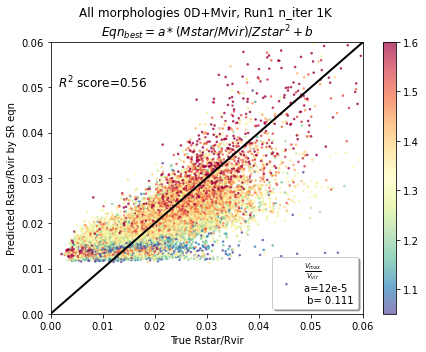

In [19]:
# 'best' eqn is the 5th eqn: 0.00012120137*SubhaloMstar_hs/SubhaloStarMetallicity**2 + 0.011172828

sr_allmorph_v1_eqn1 = (0.00012*df_0D.SubhaloMstar_hs/df_0D.SubhaloStarMetallicity**2) + 0.0111

r2_score_allmorph_1=r2_score(df_0D.SubhaloRstar_hs, sr_allmorph_v1_eqn1)

fig_complete, ax = plt.subplots(figsize=(7, 5))

fig_SR = ax.scatter(df_0D.SubhaloRstar_hs, sr_allmorph_v1_eqn1,
            c = df_0D.SubhaloVmax_hs, 
            cmap='Spectral_r',
            s=10, marker='.', alpha=0.7, vmin=1.05, vmax=1.60,
            label= r'$\frac{V_{max}}{V_{vir}}$'+'\n'+'a=12e-5 \n b= 0.111')

ax.text(0.0015, 0.05, r'$R^{2}$ score=' + '{:.2f}'.format(r2_score_allmorph_1), size=12)
ax.axis([0.0,0.06, 0.0,0.06])
ax.plot([-3.0, 1.0], [-3.0, 1.0], color = 'black', linewidth = 2)
ax.set_title('All morphologies 0D+Mvir, Run1 n_iter 1K \n'+r'$Eqn_{best}=a*(Mstar/Mvir)/Zstar^{2} + b$')
ax.set_xlabel('True Rstar/Rvir')
ax.legend(loc = 'lower right', shadow=True)
ax.set_ylabel('Predicted Rstar/Rvir by SR eqn')
fig_complete.colorbar(fig_SR, ax=ax)
# plt.savefig('TNG-SIM_images/v27_SR_eqn_search_allmorph/SR_v1_allmorph0D_eqn_search/v1_run1_Allmorph_SR_besteqn_0DwMvir.jpeg', dpi=500)
plt.show()

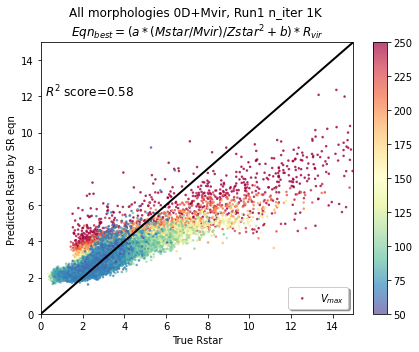

In [30]:
# 'best' eqn from the 0D dataset, plotted in its raw form now: 
# rstar/rvir = 0.00012120137*SubhaloMstar_hs/SubhaloStarMetallicity**2 + 0.011172828

sr_allmorph_v1_eqn1 = ((0.00012*(df_raw.SubhaloMstar/df_raw.Group_M_TopHat200)/df_0D.SubhaloStarMetallicity**2) + 0.0111)*df_raw.Group_R_TopHat200

r2_score_allmorph_1=r2_score(df_raw.SubhaloRstar, sr_allmorph_v1_eqn1)

fig_complete, ax = plt.subplots(figsize=(7, 5))

fig_SR = ax.scatter(df_raw.SubhaloRstar, sr_allmorph_v1_eqn1,
            c = df_raw.SubhaloVmax, 
            cmap='Spectral_r',
            s=10, marker='.', alpha=0.7,label= r'$V_{max}$', vmin=50, vmax=250)
ax.text(0.2, 12, r'$R^{2}$ score=' + '{:.2f}'.format(r2_score_allmorph_1), size=12)
ax.axis([0.0,15, 0.0,15])
ax.plot([0.0, 15], [0.0, 15], color = 'black', linewidth = 2)
ax.set_title('All morphologies 0D+Mvir, Run1 n_iter 1K \n'+r'$Eqn_{best}=(a*(Mstar/Mvir)/Zstar^{2} + b)*R_{vir}$')
ax.set_xlabel('True Rstar')
ax.legend(loc = 'lower right', shadow=True)
ax.set_ylabel('Predicted Rstar by SR eqn ')
fig_complete.colorbar(fig_SR, ax=ax)
# plt.savefig('TNG-SIM_images/v27_SR_eqn_search_allmorph/SR_v1_allmorph0D_eqn_search/v1_run1_Allmorph_SR_besteqn_0DwMvir_2.jpeg', dpi=500)
plt.show()

In [22]:
v1_SR_eqns_n_iter1K.loc[9, 'Equation']

'(((SubhaloMstar_hs * ((0.000111881505 / square(SubhaloStarMetallicity)) + SubhaloVmaxRad_hs)) + SubhaloMH2_hs) - -0.008884468)'

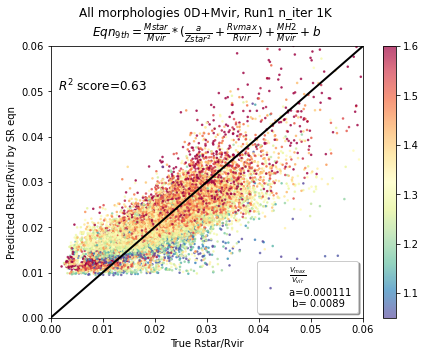

In [35]:
# the 9th eqn: '(((SubhaloMstar_hs * ((0.000111881505 / square(SubhaloStarMetallicity)) + SubhaloVmaxRad_hs)) + SubhaloMH2_hs) - -0.008884468)'

sr_allmorph_v1_eqn1 = (df_0D.SubhaloMstar_hs*((0.000111/df_0D.SubhaloStarMetallicity**2) + df_0D.SubhaloVmaxRad_hs) + df_0D.SubhaloMH2_hs) + 0.0089

r2_score_allmorph_1=r2_score(df_0D.SubhaloRstar_hs, sr_allmorph_v1_eqn1)

fig_complete, ax = plt.subplots(figsize=(7, 5))

fig_SR = ax.scatter(df_0D.SubhaloRstar_hs, sr_allmorph_v1_eqn1,
            c = df_0D.SubhaloVmax_hs, 
            cmap='Spectral_r',
            s=10, marker='.', alpha=0.7, vmin=1.05, vmax=1.60,
            label= r'$\frac{V_{max}}{V_{vir}}$'+'\n'+'a=0.000111 \n b= 0.0089')

ax.text(0.0015, 0.05, r'$R^{2}$ score=' + '{:.2f}'.format(r2_score_allmorph_1), size=12)
ax.axis([0.0,0.06, 0.0,0.06])
ax.plot([-3.0, 1.0], [-3.0, 1.0], color = 'black', linewidth = 2)
ax.set_title('All morphologies 0D+Mvir, Run1 n_iter 1K \n'+r'$Eqn_{9th}=\frac{Mstar}{Mvir} * (\frac{a}{Zstar^{2}} + \frac{Rvmax}{Rvir}) + \frac{MH2}{Mvir} + b$')
ax.set_xlabel('True Rstar/Rvir')
ax.legend(loc = 'lower right', shadow=True)
ax.set_ylabel('Predicted Rstar/Rvir by SR eqn')
fig_complete.colorbar(fig_SR, ax=ax)
# plt.savefig('TNG-SIM_images/v27_SR_eqn_search_allmorph/SR_v1_allmorph0D_eqn_search/v1_run1_Allmorph_SR_9theqn_0DwMvir.jpeg', dpi=500)
plt.show()

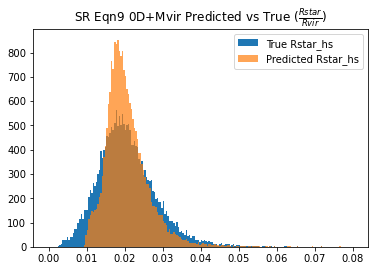

In [44]:
plt.hist(df_0D.SubhaloRstar_hs, bins=200, label='True Rstar_hs'
        , range=(0.0, 0.08))
plt.hist(sr_allmorph_v1_eqn1, bins=200, alpha=0.7, label='Predicted Rstar_hs'
        , range=(0.0, 0.08))
plt.legend(loc='upper right')
plt.title(r'SR Eqn9 0D+Mvir Predicted vs True $(\frac{Rstar}{Rvir})$')
# plt.savefig('TNG-SIM_images/v27_SR_eqn_search_allmorph/SR_v1_allmorph0D_eqn_search/v1_run1_Histogram_SReqn9_pred_true_TNG-SIM_0D_AllDatasetwMvir.jpeg', dpi=500)
plt.show()

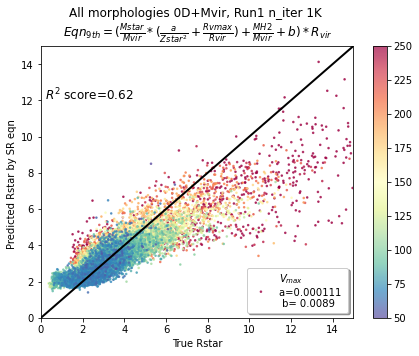

In [32]:
# the 9th eqn in its raw form: 
# rstar/rvir = (((SubhaloMstar_hs * ((0.000111881505 / square(SubhaloStarMetallicity)) + SubhaloVmaxRad_hs)) + SubhaloMH2_hs) - -0.008884468)

sr_allmorph_v1_eqn1 = ((df_0D.SubhaloMstar_hs*((0.000111/df_0D.SubhaloStarMetallicity**2) + df_0D.SubhaloVmaxRad_hs) + df_0D.SubhaloMH2_hs) + 0.0089) *df_raw.Group_R_TopHat200


r2_score_allmorph_1=r2_score(df_raw.SubhaloRstar, sr_allmorph_v1_eqn1)

fig_complete, ax = plt.subplots(figsize=(7, 5))

fig_SR = ax.scatter(df_raw.SubhaloRstar, sr_allmorph_v1_eqn1,
            c = df_raw.SubhaloVmax, 
            cmap='Spectral_r',
            s=10, marker='.', alpha=0.7,label= r'$V_{max}$'+'\n'+'a=0.000111 \n b= 0.0089', vmin=50, vmax=250)
ax.text(0.2, 12, r'$R^{2}$ score=' + '{:.2f}'.format(r2_score_allmorph_1), size=12)
ax.axis([0.0,15, 0.0,15])
ax.plot([0.0, 15], [0.0, 15], color = 'black', linewidth = 2)
ax.set_title('All morphologies 0D+Mvir, Run1 n_iter 1K \n'+r'$Eqn_{9th}=(\frac{Mstar}{Mvir} * (\frac{a}{Zstar^{2}} + \frac{Rvmax}{Rvir}) + \frac{MH2}{Mvir} + b)*R_{vir}$')
ax.set_xlabel('True Rstar')
ax.legend(loc = 'lower right', shadow=True)
ax.set_ylabel('Predicted Rstar by SR eqn ')
fig_complete.colorbar(fig_SR, ax=ax)
# plt.savefig('TNG-SIM_images/v27_SR_eqn_search_allmorph/SR_v1_allmorph0D_eqn_search/v1_run1_Allmorph_SR_9theqn_0DwMvir_2.jpeg', dpi=500)
plt.show()

#### <font color='darkorange'> <a id =10> </a> <br> All morphologies 0D+Mvir 5K iterations

In [33]:
v1_SR_eqns_n_iter5K = pd.read_csv('/Users/festabu/Desktop/ML_galaxy_size_project/Codes/TNG-SIM_images/v27_SR_eqn_search_allmorph/SR_v1_allmorph0D_eqn_search/run2_hall_of_fame_2024-03-25_105928.644.csv', sep='|')

# for i in range(SR_eqns_n_iter1K.shape[0]):
for i in range(20):
    
    print (v1_SR_eqns_n_iter5K.loc[i, 'Equation'])

0.020700997
(0.032651003 - SubhaloStarMetallicity)
square(0.15596421 - SubhaloStarMetallicity)
((SubhaloMstar_hs - SubhaloStarMetallicity) + 0.023039421)
(square(-0.1711124 - SubhaloMstar_hs) - SubhaloStarMetallicity)
((SubhaloMstar_hs + 0.0073514143) * (0.013328708 / SubhaloStarMetallicity))
((SubhaloMstar_hs + 0.007764035) * ((0.011972137 / SubhaloStarMetallicity) + SubhaloVmaxRad_hs))
((SubhaloMstar_hs * square((0.010415327 / SubhaloStarMetallicity) + SubhaloVmaxRad_hs)) + 0.010432283)
(((SubhaloMstar_hs + 0.0083544655) * ((0.0102099 / SubhaloStarMetallicity) + SubhaloVmaxRad_hs)) + SubhaloMH2_hs)
((SubhaloMstar_hs * square((0.010076513 / SubhaloStarMetallicity) + SubhaloVmaxRad_hs)) + (0.008852626 + SubhaloMH2_hs))
(((SubhaloMstar_hs * (square((0.009883241 / SubhaloStarMetallicity) + SubhaloVmaxRad_hs) + SubhaloVmaxRad_hs)) + SubhaloMH2_hs) + 0.008354559)
(((SubhaloMstar_hs * (square(pow(0.009506704 / SubhaloStarMetallicity, 1.1615216)) - (-2.781506 * SubhaloVmaxRad_hs))) + Subhalo

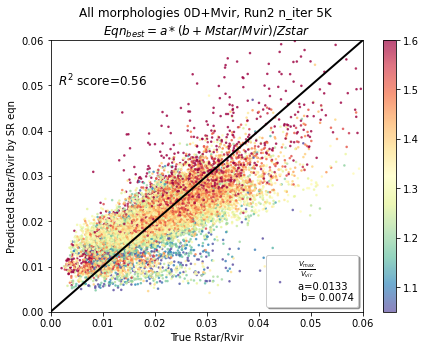

In [47]:
# 'best' eqn is the 5th eqn: 0.013328708*(SubhaloMstar_hs + 0.0073514143)/SubhaloStarMetallicity

sr_allmorph_v1_eqn1 = 0.0133*(df_0D.SubhaloMstar_hs+ 0.0074)/df_0D.SubhaloStarMetallicity

r2_score_allmorph_1=r2_score(df_0D.SubhaloRstar_hs, sr_allmorph_v1_eqn1)

fig_complete, ax = plt.subplots(figsize=(7, 5))

fig_SR = ax.scatter(df_0D.SubhaloRstar_hs, sr_allmorph_v1_eqn1,
            c = df_0D.SubhaloVmax_hs, 
            cmap='Spectral_r',
            s=10, marker='.', alpha=0.7, vmin=1.05, vmax=1.60,
            label= r'$\frac{V_{max}}{V_{vir}}$'+'\n'+'a=0.0133 \n b= 0.0074')

ax.text(0.0015, 0.05, r'$R^{2}$ score=' + '{:.2f}'.format(r2_score_allmorph_1), size=12)
ax.axis([0.0,0.06, 0.0,0.06])
ax.plot([-3.0, 1.0], [-3.0, 1.0], color = 'black', linewidth = 2)
ax.set_title('All morphologies 0D+Mvir, Run2 n_iter 5K \n'+r'$Eqn_{best}=a*(b + Mstar/Mvir)/Zstar$')
ax.set_xlabel('True Rstar/Rvir')
ax.legend(loc = 'lower right', shadow=True)
ax.set_ylabel('Predicted Rstar/Rvir by SR eqn')
fig_complete.colorbar(fig_SR, ax=ax)
# plt.savefig('TNG-SIM_images/v27_SR_eqn_search_allmorph/SR_v1_allmorph0D_eqn_search/v1_run2_Allmorph_SR_besteqn_0DwMvir.jpeg', dpi=500)
plt.show()

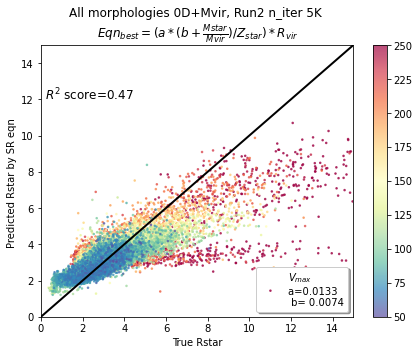

In [50]:
# 'best' eqn from the 0D dataset, plotted in its raw form now: 
# rstar/rvir = 0.00012120137*SubhaloMstar_hs/SubhaloStarMetallicity**2 + 0.011172828

sr_allmorph_v1_eqn1 = (0.0133*(df_0D.SubhaloMstar_hs+ 0.0074)/df_0D.SubhaloStarMetallicity)*df_raw.Group_R_TopHat200


r2_score_allmorph_1=r2_score(df_raw.SubhaloRstar, sr_allmorph_v1_eqn1)

fig_complete, ax = plt.subplots(figsize=(7, 5))

fig_SR = ax.scatter(df_raw.SubhaloRstar, sr_allmorph_v1_eqn1,
            c = df_raw.SubhaloVmax, 
            cmap='Spectral_r',
            s=10, marker='.', alpha=0.7,label= r'$V_{max}$'+'\n'+'a=0.0133 \n b= 0.0074', vmin=50, vmax=250)
ax.text(0.2, 12, r'$R^{2}$ score=' + '{:.2f}'.format(r2_score_allmorph_1), size=12)
ax.axis([0.0,15, 0.0,15])
ax.plot([0.0, 15], [0.0, 15], color = 'black', linewidth = 2)
ax.set_title('All morphologies 0D+Mvir, Run2 n_iter 5K \n'+r'$Eqn_{best}=(a*(b + \frac{Mstar}{Mvir})/Z_{star})*R_{vir}$')
ax.set_xlabel('True Rstar')
ax.legend(loc = 'lower right', shadow=True)
ax.set_ylabel('Predicted Rstar by SR eqn ')
fig_complete.colorbar(fig_SR, ax=ax)
# plt.savefig('TNG-SIM_images/v27_SR_eqn_search_allmorph/SR_v1_allmorph0D_eqn_search/v1_run2_Allmorph_SR_besteqn_0DwMvir_2.jpeg', dpi=500)
plt.show()

In [ ]:
7th eqn
((SubhaloMstar_hs * square((0.010415327 / SubhaloStarMetallicity) + SubhaloVmaxRad_hs)) + 0.010432283)

In [ ]:
Mstar/Mvir * (a/Zstar + Rvmax/Rvir)^2 + 0.01

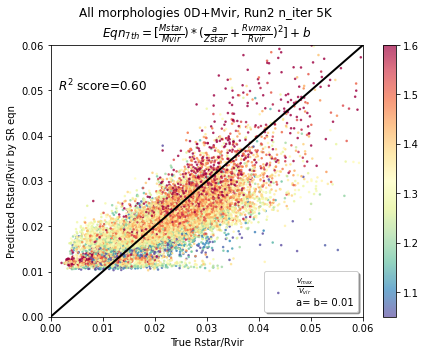

In [73]:
# the 7th eqn: ((SubhaloMstar_hs * square((0.010415327 / SubhaloStarMetallicity) + SubhaloVmaxRad_hs)) + 0.010432283)

sr_allmorph_v1_eqn1 = (df_0D.SubhaloMstar_hs * ((0.0104/df_0D.SubhaloStarMetallicity) + df_0D.SubhaloVmaxRad_hs)**2) + 0.01

r2_score_allmorph_1=r2_score(df_0D.SubhaloRstar_hs, sr_allmorph_v1_eqn1)

fig_complete, ax = plt.subplots(figsize=(7, 5))

fig_SR = ax.scatter(df_0D.SubhaloRstar_hs, sr_allmorph_v1_eqn1,
            c = df_0D.SubhaloVmax_hs, 
            cmap='Spectral_r',
            s=10, marker='.', alpha=0.7, vmin=1.05, vmax=1.60,
            label= r'$\frac{V_{max}}{V_{vir}}$'+'\n'+'a= b= 0.01')

ax.text(0.0015, 0.05, r'$R^{2}$ score=' + '{:.2f}'.format(r2_score_allmorph_1), size=12)
ax.axis([0.0,0.06, 0.0,0.06])
ax.plot([-3.0, 1.0], [-3.0, 1.0], color = 'black', linewidth = 2)
ax.set_title('All morphologies 0D+Mvir, Run2 n_iter 5K \n'+r'$Eqn_{7th}=[(\frac{Mstar}{Mvir})* (\frac{a}{Zstar} + \frac{Rvmax}{Rvir})^{2}] + b$')
ax.set_xlabel('True Rstar/Rvir')
ax.legend(loc = 'lower right', shadow=True)
ax.set_ylabel('Predicted Rstar/Rvir by SR eqn')
fig_complete.colorbar(fig_SR, ax=ax)
# plt.savefig('TNG-SIM_images/v27_SR_eqn_search_allmorph/SR_v1_allmorph0D_eqn_search/v1_run2_Allmorph_SR_7theqn_0DwMvir.jpeg', dpi=500)
plt.show()

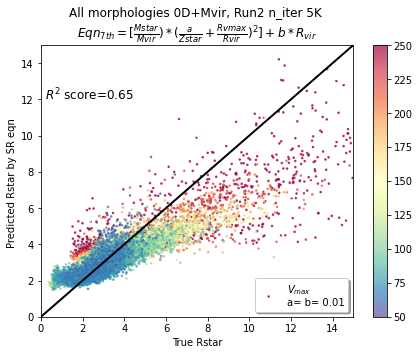

In [75]:
# the 7th eqn: ((SubhaloMstar_hs * square((0.010415327 / SubhaloStarMetallicity) + SubhaloVmaxRad_hs)) + 0.010432283)

sr_allmorph_v1_eqn1 = ((df_0D.SubhaloMstar_hs * ((0.0104/df_0D.SubhaloStarMetallicity) + df_0D.SubhaloVmaxRad_hs)**2) + 0.01 )*df_raw.Group_R_TopHat200


r2_score_allmorph_1=r2_score(df_raw.SubhaloRstar, sr_allmorph_v1_eqn1)

fig_complete, ax = plt.subplots(figsize=(7, 5))

fig_SR = ax.scatter(df_raw.SubhaloRstar, sr_allmorph_v1_eqn1,
            c = df_raw.SubhaloVmax, 
            cmap='Spectral_r',
            s=10, marker='.', alpha=0.7,label= r'$V_{max}$'+'\n'+'a= b= 0.01', vmin=50, vmax=250)
ax.text(0.2, 12, r'$R^{2}$ score=' + '{:.2f}'.format(r2_score_allmorph_1), size=12)
ax.axis([0.0,15, 0.0,15])
ax.plot([0.0, 15], [0.0, 15], color = 'black', linewidth = 2)
ax.set_title('All morphologies 0D+Mvir, Run2 n_iter 5K \n'+r'$Eqn_{7th}={[\frac{Mstar}{Mvir})* (\frac{a}{Zstar} + \frac{Rvmax}{Rvir})^{2}] + b}*R_{vir}$')
ax.set_xlabel('True Rstar')
ax.legend(loc = 'lower right', shadow=True)
ax.set_ylabel('Predicted Rstar by SR eqn ')
fig_complete.colorbar(fig_SR, ax=ax)
# plt.savefig('TNG-SIM_images/v27_SR_eqn_search_allmorph/SR_v1_allmorph0D_eqn_search/v1_run2_Allmorph_SR_7theqn_0DwMvir_2.jpeg', dpi=500)
plt.show()

#### <font color='darkorange'> <a id =10> </a> <br> All morphologies 0D+Mvir 10K iterations

In [52]:
v1_SR_eqns_n_iter10K = pd.read_csv('/Users/festabu/Desktop/ML_galaxy_size_project/Codes/TNG-SIM_images/v27_SR_eqn_search_allmorph/SR_v1_allmorph0D_eqn_search/run3_hall_of_fame_2024-03-25_172620.205.csv', sep='|')

# for i in range(SR_eqns_n_iter1K.shape[0]):
for i in range(20):
    
    print (v1_SR_eqns_n_iter10K.loc[i, 'Equation'])

0.020700995
(0.032651003 - SubhaloStarMetallicity)
square(0.15596451 - SubhaloStarMetallicity)
((SubhaloMstar_hs + 0.023039423) - SubhaloStarMetallicity)
(square(SubhaloMstar_hs + 0.17111203) - SubhaloStarMetallicity)
((SubhaloMstar_hs + 0.0073507517) / (SubhaloStarMetallicity / 0.01332928))
(((SubhaloMstar_hs + 0.00788726) / (SubhaloStarMetallicity / 0.011545261)) + SubhaloMH2_hs)
((SubhaloMstar_hs * pow(Group_M_TopHat200, 0.2800658)) / square(SubhaloStarMetallicity / -0.00042863275))
(((SubhaloMstar_hs * pow(Group_M_TopHat200, 0.24988723)) / square(SubhaloStarMetallicity / -0.0005490908)) + 0.005770456)
(((SubhaloMstar_hs + pow(SubhaloStarMetallicity, 1.2129151)) * pow(Group_M_TopHat200, 0.24132778)) / square(SubhaloStarMetallicity / -0.00059060875))
((((SubhaloMstar_hs + (SubhaloStarMetallicity * 0.42110497)) * pow(Group_M_TopHat200, 0.25127596)) - 0.4245388) / square(SubhaloStarMetallicity / 0.00052716734))
(((((SubhaloMstar_hs + (SubhaloStarMetallicity * 0.533098)) * pow(Group_M_T

best 0D eqn w n_iter 10K

0.01332928*(SubhaloMstar_hs + 0.0073507517)/SubhaloStarMetallicity

###### This is the same 'best' eqn as found with n_iter=5K

In [ ]:
7th best
((SubhaloMstar_hs * pow(Group_M_TopHat200, 0.2800658)) / square(SubhaloStarMetallicity / -0.00042863275))


In [ ]:
(Mstar/Mvir * Mvir^a)/ (b * Zstar)^2

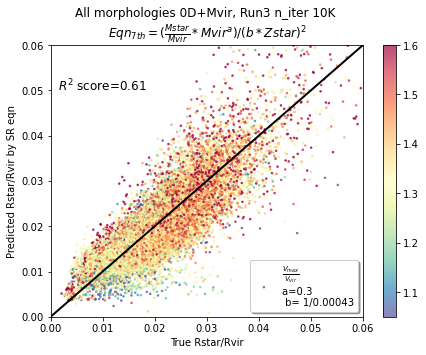

In [58]:
# 7th eqn: ((SubhaloMstar_hs * pow(Group_M_TopHat200, 0.2800658)) / square(SubhaloStarMetallicity / -0.00042863275))

sr_allmorph_v1_eqn1 = (df_0D.SubhaloMstar_hs * (df_0D.Group_M_TopHat200**0.28))/(df_0D.SubhaloStarMetallicity/0.00043)**2

r2_score_allmorph_1=r2_score(df_0D.SubhaloRstar_hs, sr_allmorph_v1_eqn1)

fig_complete, ax = plt.subplots(figsize=(7, 5))

fig_SR = ax.scatter(df_0D.SubhaloRstar_hs, sr_allmorph_v1_eqn1,
            c = df_0D.SubhaloVmax_hs, 
            cmap='Spectral_r',
            s=10, marker='.', alpha=0.7, vmin=1.05, vmax=1.60,
            label= r'$\frac{V_{max}}{V_{vir}}$'+'\n'+'a=0.3 \n b= 1/0.00043')

ax.text(0.0015, 0.05, r'$R^{2}$ score=' + '{:.2f}'.format(r2_score_allmorph_1), size=12)
ax.axis([0.0,0.06, 0.0,0.06])
ax.plot([-3.0, 1.0], [-3.0, 1.0], color = 'black', linewidth = 2)
ax.set_title('All morphologies 0D+Mvir, Run3 n_iter 10K \n'+r'$Eqn_{7th}=(\frac{Mstar}{Mvir} * Mvir^{a}) / (b*Zstar)^{2}$')
ax.set_xlabel('True Rstar/Rvir')
ax.legend(loc = 'lower right', shadow=True)
ax.set_ylabel('Predicted Rstar/Rvir by SR eqn')
fig_complete.colorbar(fig_SR, ax=ax)
# plt.savefig('TNG-SIM_images/v27_SR_eqn_search_allmorph/SR_v1_allmorph0D_eqn_search/v1_run3_Allmorph_SR_7theqn_0DwMvir.jpeg', dpi=500)
plt.show()

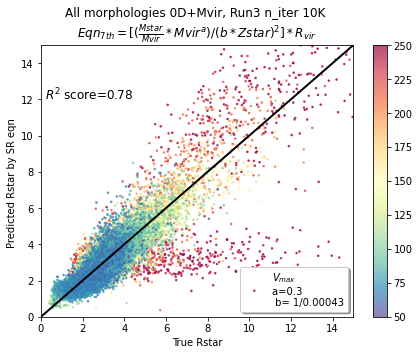

In [59]:
# 7th eqn from the 0D dataset w n_iter=10K, plotted in its raw form now: 
# rstar/rvir 

sr_allmorph_v1_eqn1 = ((df_0D.SubhaloMstar_hs * (df_0D.Group_M_TopHat200**0.28))/(df_0D.SubhaloStarMetallicity/0.00043)**2)*df_raw.Group_R_TopHat200


r2_score_allmorph_1=r2_score(df_raw.SubhaloRstar, sr_allmorph_v1_eqn1)

fig_complete, ax = plt.subplots(figsize=(7, 5))

fig_SR = ax.scatter(df_raw.SubhaloRstar, sr_allmorph_v1_eqn1,
            c = df_raw.SubhaloVmax, 
            cmap='Spectral_r',
            s=10, marker='.', alpha=0.7,label= r'$V_{max}$'+'\n'+'a=0.3 \n b= 1/0.00043', vmin=50, vmax=250)
ax.text(0.2, 12, r'$R^{2}$ score=' + '{:.2f}'.format(r2_score_allmorph_1), size=12)
ax.axis([0.0,15, 0.0,15])
ax.plot([0.0, 15], [0.0, 15], color = 'black', linewidth = 2)
ax.set_title('All morphologies 0D+Mvir, Run3 n_iter 10K \n'+r'$Eqn_{7th}=[(\frac{Mstar}{Mvir} * Mvir^{a}) / (b*Zstar)^{2}]*R_{vir}$')
ax.set_xlabel('True Rstar')
ax.legend(loc = 'lower right', shadow=True)
ax.set_ylabel('Predicted Rstar by SR eqn ')
fig_complete.colorbar(fig_SR, ax=ax)
# plt.savefig('TNG-SIM_images/v27_SR_eqn_search_allmorph/SR_v1_allmorph0D_eqn_search/v1_run3_Allmorph_SR_7theqn_0DwMvir_2.jpeg', dpi=500)
plt.show()

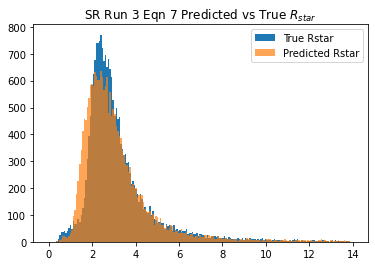

In [61]:
plt.hist(df_raw.SubhaloRstar, bins=200, label='True Rstar'
        , range=(0, 14))
plt.hist(sr_allmorph_v1_eqn1, bins=200, alpha=0.7, label='Predicted Rstar'
        , range=(0, 14))
plt.legend(loc='upper right')
plt.title(r'SR Run 3 Eqn 7 Predicted vs True $R_{star}$')
# plt.savefig('TNG-SIM_images/v27_SR_eqn_search_allmorph/SR_v1_allmorph0D_Histogram_SR_run3eqn7_pred_true_TNG-SIM_0D_AllDatasetwMvir.jpeg', dpi=500)
plt.show()

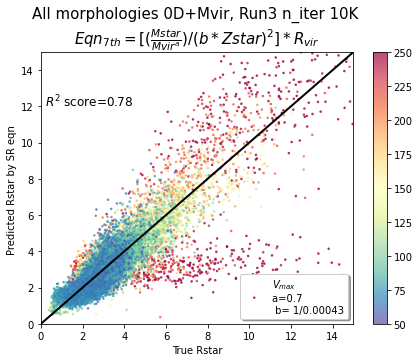

In [30]:
# Same eqn as above, simplified Mstar_hs as Mstar/Mvir and then multiplied powers of Mvir: Mvir^(0.3-1)
# 7th eqn from the 0D dataset w n_iter=10K, plotted in its raw form now: 
# rstar/rvir 

sr_allmorph_v1_eqn1 = ((df_raw.SubhaloMstar * (df_0D.Group_M_TopHat200**(0.28-1)))/(df_0D.SubhaloStarMetallicity/0.00043)**2)*df_raw.Group_R_TopHat200


r2_score_allmorph_1=r2_score(df_raw.SubhaloRstar, sr_allmorph_v1_eqn1)

fig_complete, ax = plt.subplots(figsize=(7, 5))

fig_SR = ax.scatter(df_raw.SubhaloRstar, sr_allmorph_v1_eqn1,
            c = df_raw.SubhaloVmax, 
            cmap='Spectral_r',
            s=10, marker='.', alpha=0.7,label= r'$V_{max}$'+'\n'+'a=0.7 \n b= 1/0.00043', vmin=50, vmax=250)
ax.text(0.2, 12, r'$R^{2}$ score=' + '{:.2f}'.format(r2_score_allmorph_1), size=12)
ax.axis([0.0,15, 0.0,15])
ax.plot([0.0, 15], [0.0, 15], color = 'black', linewidth = 2)
ax.set_title('All morphologies 0D+Mvir, Run3 n_iter 10K \n'+r'$Eqn_{7th}=[(\frac{Mstar}{Mvir^{a}}) / (b*Zstar)^{2}]*R_{vir}$', fontsize=15)
ax.set_xlabel('True Rstar')
ax.legend(loc = 'lower right', shadow=True)
ax.set_ylabel('Predicted Rstar by SR eqn ')
fig_complete.colorbar(fig_SR, ax=ax)
# plt.savefig('TNG-SIM_images/v27_SR_eqn_search_allmorph/SR_v1_allmorph0D_eqn_search/v1_run3_Allmorph_SR_7theqn_0DwMvir_2.jpeg', dpi=500)
plt.show()

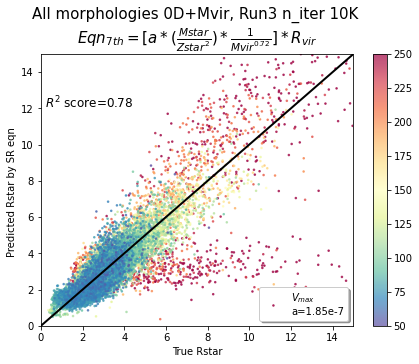

In [33]:
# Same eqn as above, simplified Mstar_hs as Mstar/Mvir and then multiplied powers of Mvir: Mvir^(0.3-1)
# 7th eqn from the 0D dataset w n_iter=10K, plotted in its raw form now: 
# rstar/rvir 
a = 1.85e-7

sr_allmorph_v1_eqn1 = a * (df_raw.SubhaloMstar/df_0D.SubhaloStarMetallicity**2) * (1 / df_0D.Group_M_TopHat200**0.72) *df_raw.Group_R_TopHat200


r2_score_allmorph_1=r2_score(df_raw.SubhaloRstar, sr_allmorph_v1_eqn1)

fig_complete, ax = plt.subplots(figsize=(7, 5))

fig_SR = ax.scatter(df_raw.SubhaloRstar, sr_allmorph_v1_eqn1,
            c = df_raw.SubhaloVmax, 
            cmap='Spectral_r',
            s=10, marker='.', alpha=0.7,label= r'$V_{max}$'+'\n'+'a=1.85e-7', vmin=50, vmax=250)
ax.text(0.2, 12, r'$R^{2}$ score=' + '{:.2f}'.format(r2_score_allmorph_1), size=12)
ax.axis([0.0,15, 0.0,15])
ax.plot([0.0, 15], [0.0, 15], color = 'black', linewidth = 2)
ax.set_title('All morphologies 0D+Mvir, Run3 n_iter 10K \n'+r'$Eqn_{7th}=[a*(\frac{Mstar}{Zstar^{2}})*\frac{1}{Mvir^{0.72}}]*R_{vir}$', fontsize=15)
ax.set_xlabel('True Rstar')
ax.legend(loc = 'lower right', shadow=True)
ax.set_ylabel('Predicted Rstar by SR eqn ')
fig_complete.colorbar(fig_SR, ax=ax)
# plt.savefig('TNG-SIM_images/v27_SR_eqn_search_allmorph/SR_v1_allmorph0D_eqn_search/v1_run3_Allmorph_SR_7theqn_0DwMvir_2.jpeg', dpi=500)
plt.show()

In [26]:
(1/0.00043)**2

5408328.826392645

In [27]:
1/((1/0.00043)**2)

1.849e-07

In [28]:
0.28-1

-0.72